In [1]:
import numpy as np
# inputs, x --> feature
# y = labels
# It's an classification and supervised learning algorithm

In [2]:
#Euclidean distance(l2)
#(x1,y1) ,(x2,y2), avoid using scalar, try using vector forms

a = [1,2,3]
b = [4,5,6]

a = np.array(a)
b = np.array(b)

L2dist = (np.sum((b-a)**2))**0.5
print(L2dist)

5.196152422706632


In [3]:
#Manhattan (L1)

L1dist = np.sum(abs(a-b)) # but when we do a-b, we will get -9. So, we will take an absolute value
print(L1dist)

9


In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
mean1 = np.array([1,0])

cov1 = np.array([[1,0.1],[0.1,1.2]]) # covariace for 2 dimension # it tells how much data us spread in both direction 1 --> horixontal, beech wale 0.1--> diagonal and last waala 1.2 --> vertical

dist1 = np.random.multivariate_normal(mean1,cov1,500) # 500 are no of data points to be generated
print(dist1.shape) # 500 samples and 2 features W & R

mean2 = np.array([4,5])

cov2 = np.array([[1,0.1],[0.1,1.2]])

dist2 = np.random.multivariate_normal(mean2,cov2,500)
print(dist2.shape)

(500, 2)
(500, 2)


In [25]:
# we need to pass one values as x and other as y in scatter plot

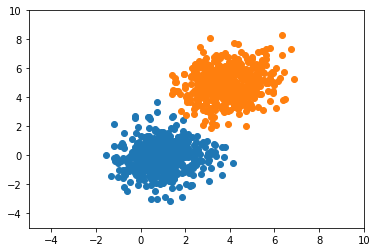

In [6]:
plt.xlim(-5,10)
plt.ylim(-5,10)

plt.scatter(dist1[:,0],dist1[:,1])
plt.scatter(dist2[:,0],dist2[:,1])

plt.show()

In [7]:
data = np.zeros((1000,3))

data[:500,:2] = dist1

data[500:,:2] = dist2

data[500:,-1] = 1

print(data.shape)
data.mean(axis=0)

(1000, 3)


array([2.45481233, 2.41626796, 0.5       ])

In [8]:
print(data[:10])
np.random.shuffle(data) #It shuffles the rows order
print(data[:10])

[[ 0.94100978 -0.48398587  0.        ]
 [-0.08933607  0.89849697  0.        ]
 [ 1.35150294  1.86071271  0.        ]
 [ 0.11080529 -0.35828199  0.        ]
 [ 1.49719641  1.01243839  0.        ]
 [-0.12336772 -1.04472523  0.        ]
 [ 0.61479299 -0.23362559  0.        ]
 [ 1.53613886 -1.21526154  0.        ]
 [ 2.10649293  0.11864722  0.        ]
 [ 0.71807573  0.75317503  0.        ]]
[[ 5.03105928  6.2625547   1.        ]
 [ 3.76378644  6.12194926  1.        ]
 [ 3.41166657  3.48240326  1.        ]
 [ 3.88033855  5.0875353   1.        ]
 [ 1.43759382  2.70460967  0.        ]
 [ 1.72857266 -0.13964769  0.        ]
 [ 6.31799587  8.27879198  1.        ]
 [ 0.34649974 -0.12568495  0.        ]
 [ 3.09203521  8.0598348   1.        ]
 [ 1.55070865 -0.30239569  0.        ]]


In [9]:
def distance(a,b):
    return (np.sum((b-a)**2))**0.5  #x-train --> r&w and y-train me output labels

In [10]:
def knn(x_train,y_train,test_point,k=7):
    vals=[]
    
    for i in range(x_train.shape[0]):
        d = distance(x_train[i],test_point)
        vals.append([d,y_train[i]])
    
    sorted_labels = sorted(vals,key=lambda r : r[0])
    neighbors = np.asarray(sorted_labels)[:k,-1] # using this it will use the same sorted_labels list, and so it will save the memory
    
    #print(neighbors)
    
    freq = np.unique(neighbors,return_counts=True)
    #print(freq)
    index= freq[1].argmax()  # It will return the index of maximum value
    return freq[0][index]


In [18]:
x_train = data[:,:2]

y_train = data[:,-1]

test_point = np.array([1,2])

knn(x_train,y_train,test_point)

0.0

In [19]:
split = int((0.75 * data.shape[0]))

x_train = data[:split,:2]
y_train = data[:split,-1]

x_test = data[split:,:2]
y_test = data[split:,-1]

print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)


(750, 2) (750,) (250, 2) (250,)


In [20]:
def acc(k): # k is called as hyper-parameter
    
    predictions = []
    
    for i in range(x_test.shape[0]):
        
        test_point = x_test[i]
        
        predicted_label = knn(x_train,y_train,test_point,k)
        predictions.append(predicted_label)
    
    preds = np.asarray(predictions)
    #print(y_test == preds)
    
    return 100 * (y_test == preds).sum() / preds.shape[0]
                

In [21]:
for k in range(1,10):
    print(f" For k ={k} acc={acc(k)}")

 For k =1 acc=100.0
 For k =2 acc=100.0
 For k =3 acc=100.0
 For k =4 acc=100.0
 For k =5 acc=100.0
 For k =6 acc=100.0
 For k =7 acc=100.0
 For k =8 acc=100.0
 For k =9 acc=100.0


In [35]:
import sklearn

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(x_train,y_train)
neigh.score(x_test,y_test)

0.996